=================================================

    Milestone 1

    Nama  : Ali Abdurrahman
    Batch : HCK-30

    Program ini dibuat untuk menganalisa database mobil bekas hasil scraping dari web mobil123. Di program ini kita menganalisa faktor-faktor apa saja yang mempengaruhi harga mobil bekas. Hal ini dilakukan untuk memahami pola harga penjualan mobil bekas di Indonesia yang nantinya akan digunakan oleh konsultan maupun client (calon pembeli) untuk menentukan harga yang ingin didapatkan sesuai informasi yang ada di visualisasi data beserta analisanya.
=================================================

# Milestone 1

*Sebuah konsultan memiliki data mobil bekas di Indonesia. Mereka berniat menganalisa persebaran data harga penjualan mobil bekas. Mereka melakukan itu dengan tujuan mengetahui bagaimana pola penjualan mobil bekas, berapa tren harga yang beredar di pasaran, dan faktor apa saja yang memengaruhi harga penjualannya.*

---

## SMART & Problem Statement

### SMART

- **Specific:** Menganalisis pola harga penjualan mobil bekas di Indonesia, termasuk persebaran harga, tren tahun produksi, kilometer tempuh, lokasi, dan jenis mesin.
- **Measurable:** Menggunakan dataset berisi lebih dari 24.000 entri mobil bekas dengan fitur harga, tahun, kilometer, lokasi, dan lainnya untuk mengukur tren dan perbedaan harga.
- **Achievable:** Data tersedia dalam format terstruktur (hasil scraping web mobil123 dalam bentuk .xlsx) dan dapat dianalisis menggunakan Python, pandas, dan alat visualisasi seperti seaborn.
- **Relevant:** Menganalisis harga pasaran mobil bekas diharapkan membantu konsultan untuk memberikan wawasan kepada klien tentang faktor yang memengaruhi harga mobil bekas di pasar Indonesia.
- **Time-Bound:** Proyek ini ditargetkan selesai dalam waktu satu minggu, mencakup eksplorasi data, analisis statistik, visualisasi.

---

### Problem Statement

*Sebuah konsultan memiliki data mobil bekas di Indonesia. Mereka berniat menganalisa persebaran data harga penjualan mobil bekas. Mereka melakukan itu dengan tujuan mengetahui bagaimana pola penjualan mobil bekas, berapa trend harga yang beredar di pasaran, dan faktor apa saja yang mempengaruhi harga penjualannya sehingga dapat memperkirakan harga yang wajar dan reperesentatif.*

---

### Penjabaran Masalah

- Apa saja **faktor** yang paling memengaruhi harga jual mobil bekas?
- Mengapa penting mengetahui **persebaran data** dan **membersihkannya dari outlier**?
- Di wilayah mana **mobil bekas cenderung memiliki harga tertinggi/rendah**?
- Apakah **tahun produksi** memengaruhi harga secara signifikan?
- Apakah **kilometer** yang dihabiskan (KM_1) berpengaruh terhadap nilai harga?
- Bagaimana **korelasi antara harga, tahun produksi, dan kilometer** yang dihabiskan?
- Ada dua tipe mesin: **automatic** dan **manual**. Seberapa signifikan perbedaan harga mobil dengan dua jenis mesin tersebut?

---

### Target Audience/User

-  **Konsultan** yang ingin memahami pola pasar mobil bekas.
-  **Dealer mobil** yang ingin menetapkan harga jual yang kompetitif.
-  **Calon pembeli mobil bekas** agar mengetahui harga wajar (Client).


Setting Library dan tools untuk memunculkan dan mengolah data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [44]:
pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##  Load Dataset

In [3]:
df = pd.read_excel("P0M1_Ali_Abdurrahman.xlsx")
df.head()

,Unnamed: 0,listing__type,item,ellipsize,listing__excerpt,machine_type,location,price,year,KM,KM_1,KM_2,brand,brand_type
0,0,Bekas,85 - 90K KM,2013 Honda City 1.5 E Sedan - AT Kondisi Bagus,Honda City E Matic Tahun 2013 Kondisi Mulus Te...,Automatic,Jawa Barat,135000000,2013,85 - 90K,85440,90000,Honda,City 1.5 E Sedan
1,1,Bekas,25 - 30K KM,2023 Honda Brio 1.2 Satya E Hatchback - TDP MU...,"🔥 TDP Mulai 5 Juta 🔥 Siapa Cepat Dia Dapat, Ka...",Automatic,DKI Jakarta,153000000,2023,25 - 30K,29087,30000,Honda,Brio 1.2 Satya E Hatchback
2,2,Bekas,15 - 20K KM,2013 Porsche Cayman 2.7 Standard Coupe - Odo 1...,1.175M (Cash) / 1.075M (Credit) Porsche Cayman...,Automatic,Banten,1075000000,2013,15 - 20K,19807,20000,Porsche,Cayman 2.7 Standard Coupe
3,3,Bekas,85 - 90K KM,2015 Nissan Grand Livina 1.5 Highway Star MPV,"MOBIL BEKAS BERKUALITAS, GOOD CONDITION, - Cas...",Automatic,Jawa Barat,130000000,2015,85 - 90K,89370,90000,Nissan,Grand Livina 1.5 Highway Star MPV
4,4,Bekas,20 - 25K KM,2023 Hyundai Stargazer 1.5 Prime MPV - TDP MUL...,"🔥 TDP Mulai 5 Juta 🔥 Siapa Cepat Dia Dapat, Ka...",Automatic,DKI Jakarta,217000000,2023,20 - 25K,20295,25000,Hyundai,Stargazer 1.5 Prime MPV


## 📊 Kolom Penting dalam Dataset

Dataset ini memuat berbagai informasi mengenai mobil bekas yang dijual. Berikut adalah penjelasan tiap kolom utama yang digunakan dalam analisis:

| Kolom            | Deskripsi                                                                 |
|------------------|---------------------------------------------------------------------------|
| `price`          | Harga jual mobil dalam satuan IDR (Rupiah)                                |
| `year`           | Tahun produksi kendaraan                                                  |
| `KM_1`           | Estimasi kilometer tempuh mobil dalam format numerik                      |
| `KM_2`           | Nilai maksimum dari range kilometer mobil (jika tersedia)                 |
| `brand`          | Merek mobil (contoh: Honda, Toyota, Porsche, dll)                         |
| `brand_type`     | Tipe atau model spesifik dari mobil tersebut                              |
| `machine_type`   | Jenis transmisi mobil: Automatic atau Manual                              |
| `location`       | Lokasi penjualan mobil (misalnya DKI Jakarta, Jawa Barat, dll)            |
| `listing__excerpt` | Deskripsi singkat mengenai kondisi atau penawaran mobil                 |
| `ellipsize`      | Judul iklan mobil yang mengandung ringkasan info seperti tahun & tipe     |

Kolom-kolom ini menjadi dasar eksplorasi visual, statistik deskriptif, dan inferensial untuk memahami faktor-faktor yang memengaruhi harga mobil bekas.


Berikut adalah tampilan dataset yang mencakup:
- **Tipe data**
- **Jumlah missing values**
- **Jumlah nilai unik per kolom**

Kita mengidentifikasi kolom mana saja yang perlu ditangani sebelum masuk ke tahap analisis lebih lanjut.


In [46]:
df.info()
df.isnull().sum()
# Mengecek missing values, tipe data, dan jumlah nilai unik per kolom
missing_summary = df.isnull().sum()
data_types = df.dtypes
unique_values = df.nunique()

# Gabungkan dalam satu tabel ringkasan
overview = pd.DataFrame({
    'Data Type': data_types,
    'Missing Values': missing_summary,
    'Unique Values': unique_values
})

overview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27781 entries, 0 to 27780
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        27781 non-null  int64 
 1   listing__type     25415 non-null  object
 2   item              27781 non-null  object
 3   ellipsize         27781 non-null  object
 4   listing__excerpt  27779 non-null  object
 5   machine_type      27781 non-null  object
 6   location          27781 non-null  object
 7   price             27781 non-null  int64 
 8   year              27781 non-null  int64 
 9   KM                27781 non-null  object
 10  KM_1              27781 non-null  int64 
 11  KM_2              27781 non-null  int64 
 12  brand             27781 non-null  object
 13  brand_type        27781 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.0+ MB


,Data Type,Missing Values,Unique Values
Unnamed: 0,int64,0,27781
listing__type,object,2366,3
item,object,0,1348
ellipsize,object,0,27781
listing__excerpt,object,2,19413
machine_type,object,0,2
location,object,0,24
price,int64,0,2022
year,int64,0,47
KM,object,0,1348


**Tangani Missing Values:**
Kolom `listing__type` dan `listing__excerpt` memiliki missing values → akan kita hapus dan handle missing valuesnya:

In [47]:
df_cleaned = df.dropna(subset=['listing__type', 'listing__excerpt'])
rows, cols = df_cleaned.shape
print(f"Jumlah baris: {rows} dan jumlah kolom: {cols}")

Jumlah baris: 25413 dan jumlah kolom: 14


##  Ukuran Dataset Setelah Pembersihan

Setelah proses pembersihan missing values, terdapat **25.413 baris data** yang siap dianalisis.

Artinya:
- **25.413 baris data (observasi)** mewakili mobil bekas yang valid untuk dianalisis.
- **14 kolom (fitur)** berisi informasi penting seperti harga, tahun, kilometer, lokasi, brand, dan tipe mesin.

Dataset ini sekarang sudah cukup bersih dan representatif untuk dilakukan eksplorasi lebih lanjut.


##  Statistik Deskriptif Awal

In [48]:
# Statistik deskriptif awal untuk kolom numerik
desc = df_cleaned[['price', 'year', 'KM_1', 'KM_2']].describe()

# Ambil nilai median secara manual
median_vals = df_cleaned[['price', 'year', 'KM_1', 'KM_2']].median()

# Gabungkan mean, std, min, median, max ke dalam satu tabel
summary_table = pd.DataFrame({
    'Mean': desc.loc['mean'],
    'Std Dev': desc.loc['std'],
    'Min': desc.loc['min'],
    'Median': median_vals,
    'Max': desc.loc['max']
})

# Format nilai agar mudah dibaca (misalnya dalam jutaan/kilometer)
summary_table = summary_table.applymap(lambda x: f"{x:,.0f}")
summary_table


C:\Users\USER\AppData\Local\Temp\ipykernel_17588\1750675859.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_table = summary_table.applymap(lambda x: f"{x:,.0f}")


,Mean,Std Dev,Min,Median,Max
price,"464,413,615","874,363,748","5,000,000","255,000,000","85,900,000,098"
year,"2,019",5,"1,959","2,019","2,025"
KM_1,"49,564","42,709",0,"39,692","1,150,000"
KM_2,"51,691","42,631",1,"40,000","1,150,000"


## Statistik Deskriptif Awal

Berikut adalah ringkasan statistik untuk kolom numerik utama dalam dataset:

| Kolom     | Mean         | Std Dev      | Min       | Median     | Max         |
|-----------|--------------|--------------|-----------|------------|-------------|
| **price** | ~464 juta    | ~874 juta    | 5 juta    | 255 juta   | 85,9 milyar |
| **year**  | 2018.6       | 4.59         | 1959      | 2019       | 2025        |
| **KM_1**  | ~49.564 km   | ~42.700 km   | 0         | ~39.692 km | 1.150.000 km|
| **KM_2**  | ~51.691 km   | ~42.630 km   | 1         | ~40.000 km | 1.150.000 km|

Dari tabel di atas, dapat dilihat bahwa:
- Harga mobil memiliki rentang yang sangat luas, dari 5 juta hingga 85 Miliar, menunjukkan kemungkinan adanya outlier.
- Tahun produksi mobil bervariasi dari 1959 hingga 2025, dengan median di tahun 2019.
- Jarak tempuh sebagian besar mobil bekas berkisar antara 0 hingga 1,1 juta kilometer, juga menunjukkan kemungkinan anomali data yang perlu dibersihkan.
- Nilai standard deviasi pada kolom `price` (~874 juta) sangat besar, menandakan bahwa harga mobil bekas sangat bervariasi, bahkan terdapat nilai ekstrem atau outlier, seperti mobil mewah bernilai miliaran rupiah.
- Standard deviasi `year` (4.6 tahun) menunjukkan bahwa sebagian besar mobil dalam dataset diproduksi dalam kurun waktu yang relatif berdekatan.
- Kolom `KM_1` dan `KM_2` juga memiliki penyebaran yang cukup tinggi (~42 ribu km), mengindikasikan variasi besar pada penggunaan kendaraan—beberapa digunakan secara intensif, sebagian lainnya hanya sedikit dipakai. Hal ini menjadi dasar penting untuk melakukan deteksi dan pembersihan outlier selanjutnya.



###  Langkah Selanjutnya:

1. **Outlier Analysis** untuk kolom harga dan jumlah mobil untuk menjaga kualitas analisis dan visualisasi.
2. **Distribusi Harga dan Kilometer** melalui histogram dan boxplot, untuk memahami pola penyebaran.

### Distribusi (Persebaran Data) Harga Mobil Bekas Secara Menyeluruh

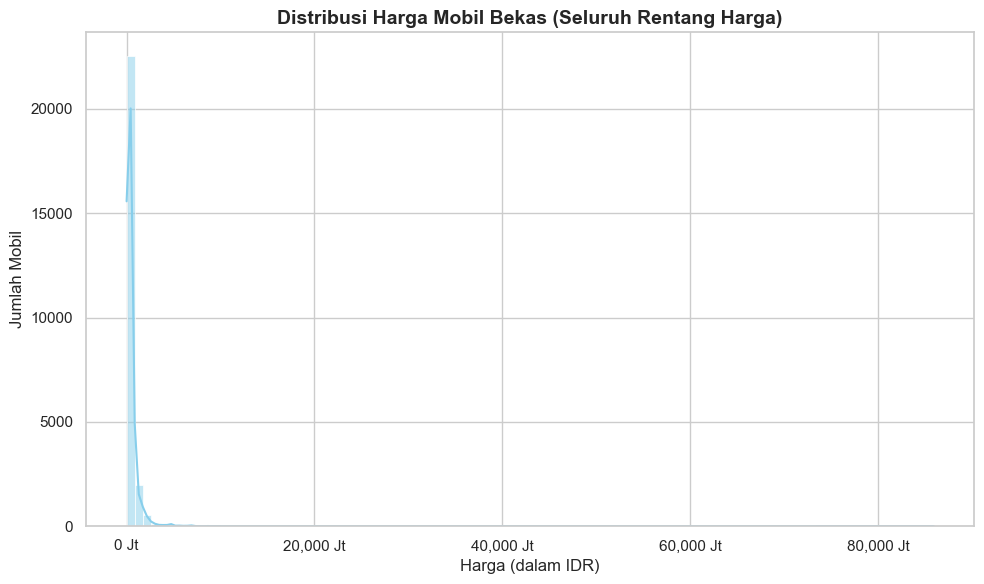

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_theme(style="whitegrid")  

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=100, kde=True, color='skyblue')

plt.title('Distribusi Harga Mobil Bekas (Seluruh Rentang Harga)', fontsize=14, fontweight='bold')
plt.xlabel('Harga (dalam IDR)', fontsize=12)
plt.ylabel('Jumlah Mobil', fontsize=12)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1_000_000):,} Jt'))
plt.tight_layout()
plt.show()


### Distribusi Harga Mobil Bekas (Seluruh Rentang Harga)

Histogram diatas menampilkan distribusi harga mobil bekas dari seluruh rentang harga secara keseluruhan 

Distribusi tampak **sangat condong ke kanan (right-skewed)**, menunjukkan bahwa mayoritas mobil berada dalam kisaran harga rendah hingga menengah, sedangkan sebagian kecil lainnya memiliki harga yang sangat tinggi.

Insight penting dari visualisasi ini:
- Terdapat **outlier harga sangat tinggi**, yang bisa memengaruhi rata-rata dan analisis lanjutan
- Distribusi harga **tidak normal** dan mungkin lebih cocok dianalisis dengan pendekatan robust (IQR)


### Tujuan Visualisasi Seluruh Distribusi Harga Mobil

Visualisasi distribusi harga mobil bekas tanpa pembatasan memungkinkan kita melihat **gambaran penuh** terhadap variasi harga yang tersedia di pasar. Dengan menggunakan seluruh data harga:

- Kita dapat mengidentifikasi apakah terdapat **skewness (kemencengan distribusi)**, outlier, atau anomali pada harga.
- Visualisasi ini membantu **menilai kebutuhan transformasi data**, seperti log transform, saat ingin membuat model prediktif yang lebih stabil.
- Kita juga bisa menilai secara kasar **prosentase mobil dengan harga ekstrem tinggi** dibandingkan jumlah keseluruhan.

Tetapi, karena adanya harga-harga ekstrem (outlier) yang bisa mencapai puluhan miliar, bentuk distribusi menjadi sangat tidak proporsional
Oleh karena itu, kita coba sempitkan range harga ke bawah 2 Miliar supaya visualisasi lebih terlihat

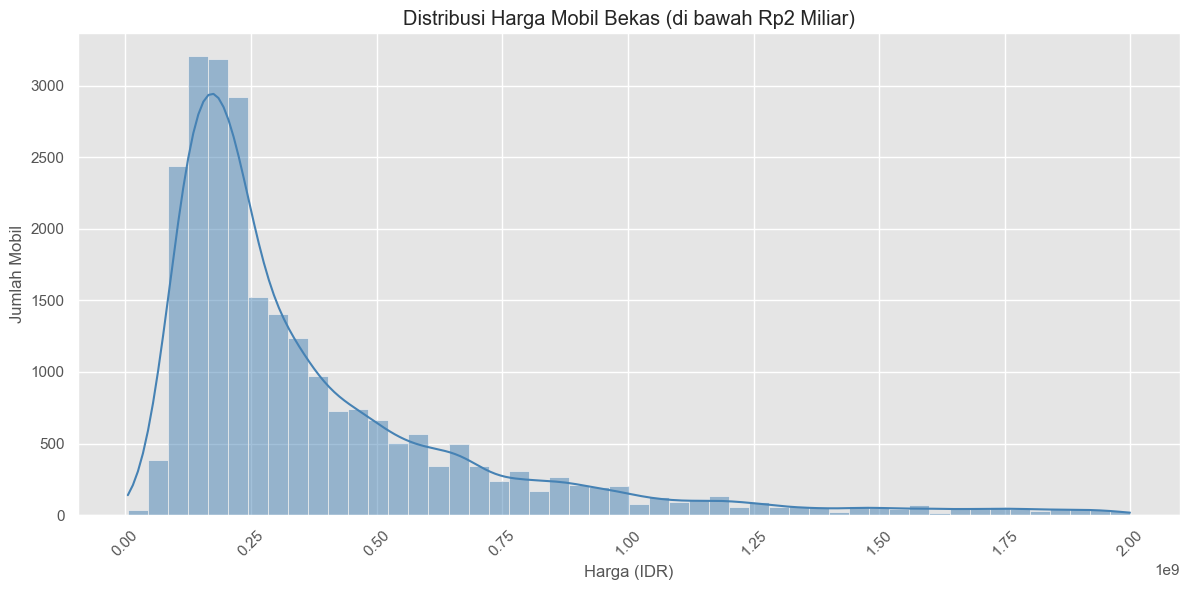

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.figure(figsize=(12, 6))

# Filter harga < 2 miliar IDR untuk menghindari distorsi outlier ekstrem
sns.histplot(df_cleaned[df_cleaned['price'] < 2_000_000_000]['price'], 
             bins=50, kde=True, color='steelblue')

plt.title('Distribusi Harga Mobil Bekas (di bawah Rp2 Miliar)')
plt.xlabel('Harga (IDR)')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Mengapa dibatasi pada harga ≤ Rp2 miliar?**

- **Mayoritas** mobil bekas di dataset berada pada rentang **< Rp2 miliar**.
- Membatasi harga memungkinkan kita untuk **melihat pola distribusi utama dengan lebih jelas** tanpa terganggu skala besar akibat outlier.
- Visualisasi terbatas ini berguna untuk **eksplorasi awal**, terutama jika klien memiliki preferensi harga menengah ke bawah.

Keduanya (dengan dan tanpa filter harga) **saling melengkapi** dalam eksplorasi data, dan perlu ditampilkan tergantung fokus analisis.



#### Boxplot Persebaran Data Harga Mobil

# Visualisasi Boxplot Harga Mobil Bekas

###  Permasalahan Visualisasi Awal (Gambar di bawah)

Visualisasi awal berupa **boxplot harga mobil bekas** memperlihatkan distribusi data yang sangat **tidak merata (right-skewed)** serta dipenuhi **outlier ekstrem**.

Boxplot awal dibuat tanpa pembatas pada sumbu X, sehingga rentang harga mencakup hingga lebih dari **Rp80.000.000.000 (80 miliar)**. Hal ini menyebabkan beberapa masalah:

- **Sebagian besar data tertumpuk di sisi kiri** dan sulit dibaca.
- **Box utama (Q1–Q3)** hampir tidak terlihat.
- **Outlier** dalam jumlah besar mendominasi tampilan grafik.

> *“Distribusi harga sangat tidak seimbang, dan visualisasi gagal menangkap informasi utama karena skala terlalu lebar akibat outlier ekstrem.”*

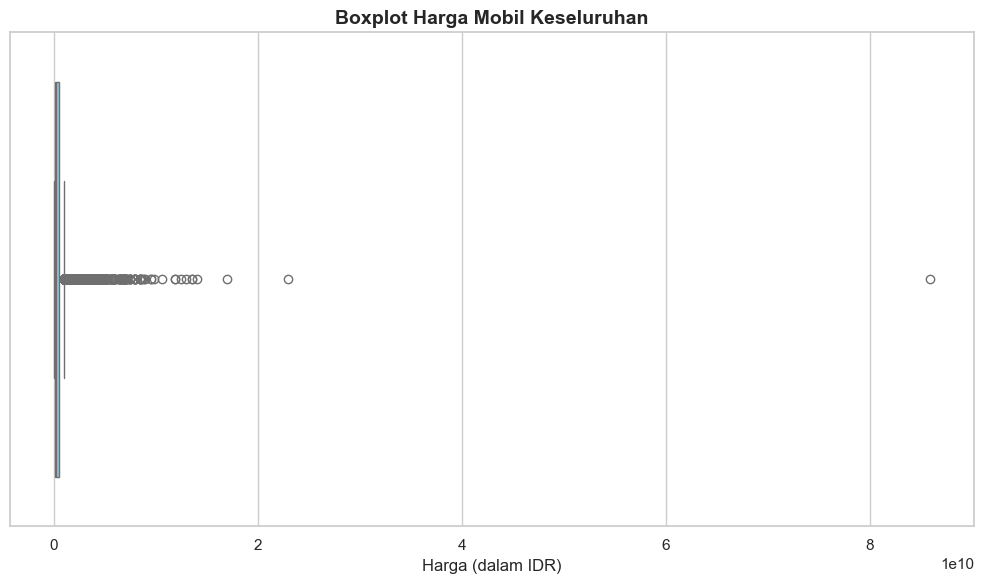

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")  # Gunakan style seaborn
plt.figure(figsize=(10, 6))

sns.boxplot(x=df_cleaned['price'], color='skyblue')

plt.title('Boxplot Harga Mobil Keseluruhan', fontsize=14, fontweight='bold')
plt.xlabel('Harga (dalam IDR)', fontsize=12)
plt.tight_layout()
plt.show()


## Solusi: Membatasi Rentang Sumbu X

Untuk meningkatkan keterbacaan, visualisasi boxplot diperbaiki dengan **membatasi sumbu X hingga Rp1.500.000.000 (1,5 miliar)**. Alasan pemilihan batas ini:

- Mencakup mayoritas harga mobil bekas pada pasar riil.
- Membuat sebaran data (kuartil, median) terlihat jelas.
- Tidak menghilangkan outlier secara permanen — hanya menyaringnya dari tampilan visual utama.

Visualisasinya sebagai berikut:

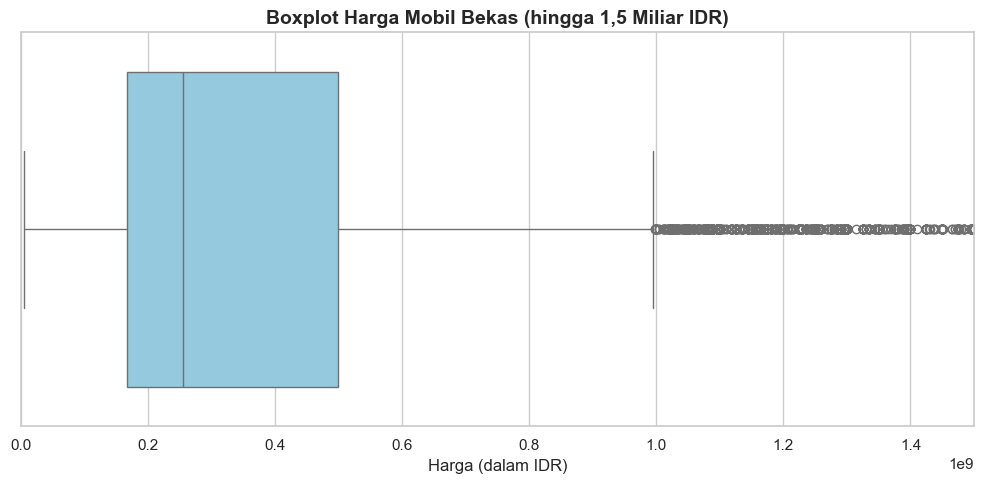

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['price'], color='skyblue')

plt.xlim(0, 1_500_000_000)  # batasi ke 1.5 Miliar IDR
plt.title('Boxplot Harga Mobil Bekas (hingga 1,5 Miliar IDR)', fontsize=14, fontweight='bold')
plt.xlabel('Harga (dalam IDR)', fontsize=12)
plt.tight_layout()
plt.show()


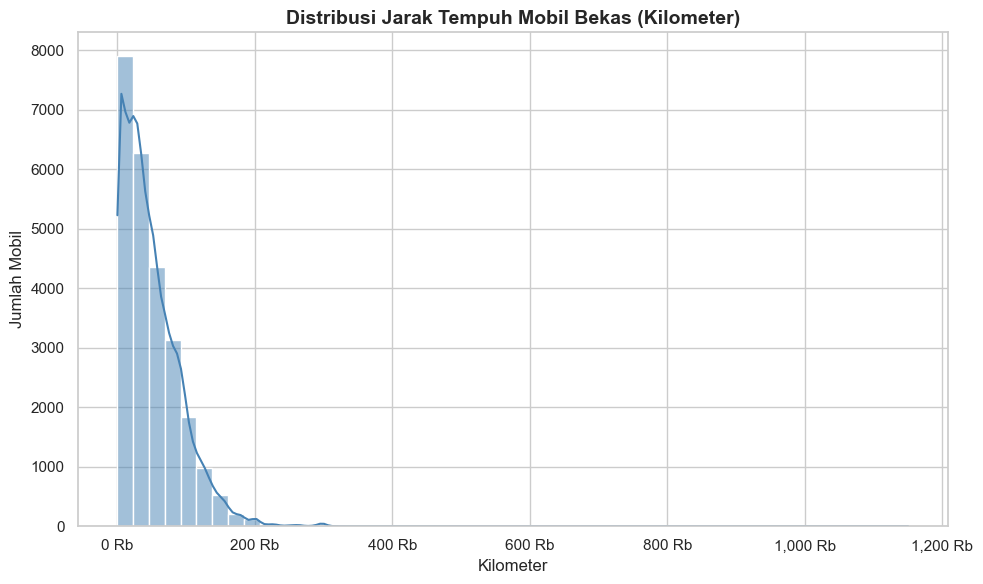

In [53]:
# CELL 1: Histogram Kilometer Mobil

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['KM_1'], bins=50, kde=True, color='steelblue')

plt.title('Distribusi Jarak Tempuh Mobil Bekas (Kilometer)', fontsize=14, fontweight='bold')
plt.xlabel('Kilometer', fontsize=12)
plt.ylabel('Jumlah Mobil', fontsize=12)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1_000):,} Rb'))
plt.tight_layout()
plt.show()


## Histogram Kilometer Mobil Bekas

Histogram ini menunjukkan **distribusi jarak tempuh (kilometer)** pada mobil bekas yang tersedia dalam dataset.

- Sumbu X menunjukkan kilometer tempuh (dalam ribuan).
- Sumbu Y menunjukkan jumlah mobil dalam masing-masing interval.

### Insight:
- Mayoritas mobil memiliki jarak tempuh di bawah 150.000 km.
- Distribusi sedikit **right-skewed**, menunjukkan beberapa mobil dengan kilometer sangat tinggi.

Histogram ini berguna untuk memahami **sebaran umum dan penyimpangan** dari data kilometer.


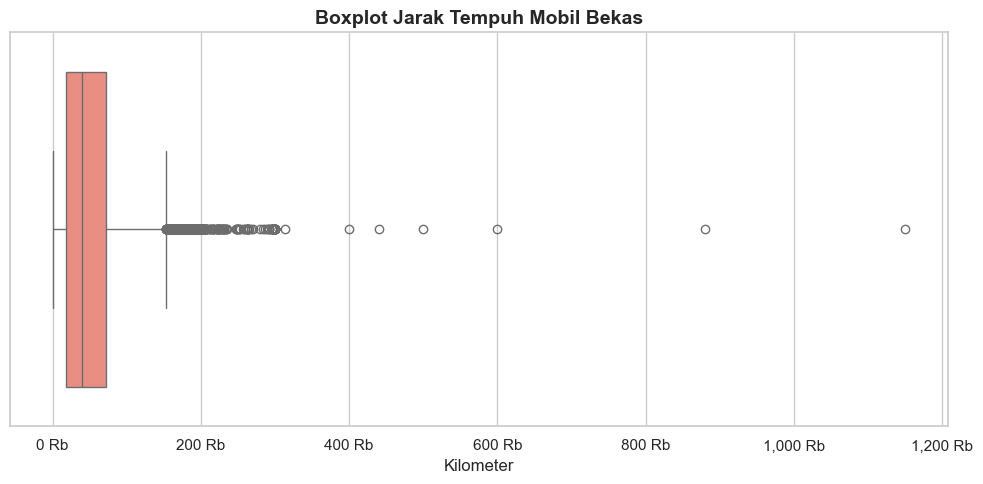

In [54]:
# CELL 2: Boxplot Kilometer Mobil

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['KM_1'], color='salmon')

plt.title('Boxplot Jarak Tempuh Mobil Bekas', fontsize=14, fontweight='bold')
plt.xlabel('Kilometer', fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1_000):,} Rb'))
plt.tight_layout()
plt.show()


## Boxplot Kilometer Mobil Bekas

Boxplot ini menunjukkan **distribusi statistik lima angka** untuk jarak tempuh (kilometer) pada mobil bekas:

- **Q1 (Kuartil bawah)**, **Q2 (Median)**, dan **Q3 (Kuartil atas)** ditampilkan dalam bentuk kotak.
- **Whisker** menunjukkan jangkauan data non-outlier.
- Titik-titik di luar whisker adalah **outlier** (mobil dengan kilometer jauh lebih tinggi dari kebanyakan).

### Insight:
- Sebaran data menunjukkan **nilai median cukup rendah** (sekitar 80–120 ribu km).
- Banyak mobil dengan kilometer tinggi yang dikategorikan sebagai outlier.
- Distribusi menunjukkan **kondisi kendaraan yang bervariasi**, dari sedikit digunakan hingga sangat intensif.

Boxplot ini penting untuk mengenali **mobil ekstrem** dalam hal pemakaian jarak tempuh.


##  Outlier Filtering: `price` dan `KM_1` berdasarkan IQR

In [55]:
Q1_price = df_cleaned['price'].quantile(0.25)
Q3_price = df_cleaned['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_price = Q3_price + 1.5 * IQR_price

Q1_km = df_cleaned['KM_1'].quantile(0.25)
Q3_km = df_cleaned['KM_1'].quantile(0.75)
IQR_km = Q3_km - Q1_km
upper_km = Q3_km + 1.5 * IQR_km

df_filtered = df_cleaned[(df_cleaned['price'] <= upper_price) & (df_cleaned['KM_1'] <= upper_km)]
df_filtered.shape

(22679, 14)

In [66]:
df_filtered.to_excel('car_data_cleaned.xlsx', index=False)


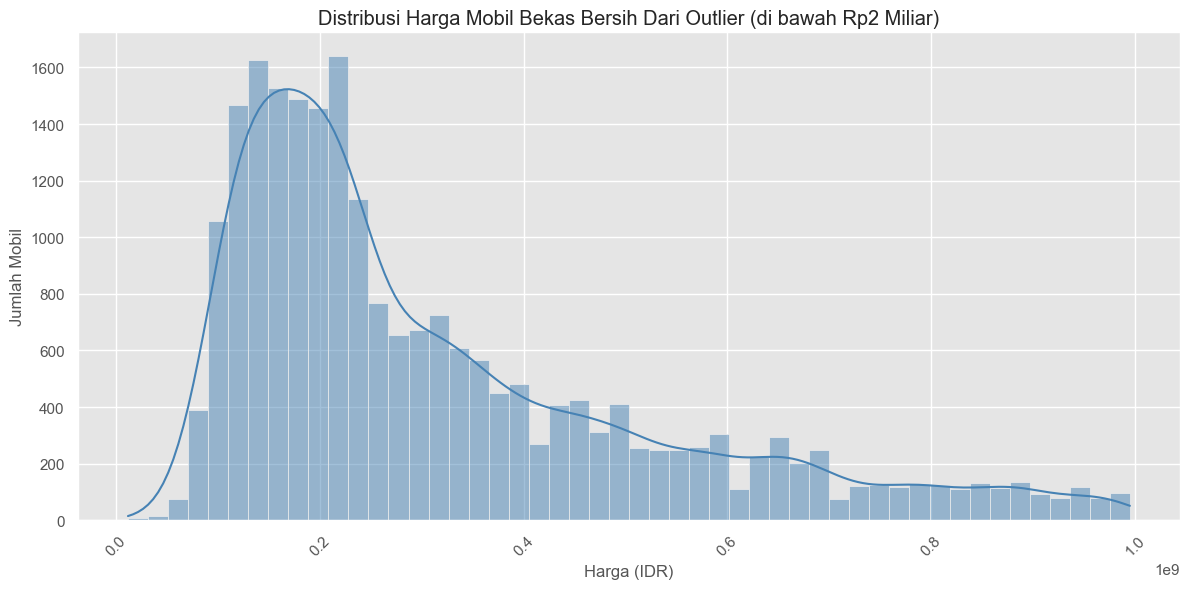

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.figure(figsize=(12, 6))

# Filter harga < 2 miliar IDR untuk menghindari distorsi outlier ekstrem
sns.histplot(df_filtered[df_filtered['price'] < 2_000_000_000]['price'], 
             bins=50, kde=True, color='steelblue')

plt.title('Distribusi Harga Mobil Bekas Bersih Dari Outlier (di bawah Rp2 Miliar)')
plt.xlabel('Harga (IDR)')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Mengapa Perlu Mendeteksi Outlier dalam Analisis Mobil Bekas?

Dalam proyek ini, salah satu tujuan kita adalah membantu menentukan harga **wajar** dan **representatif** dari mobil bekas berdasarkan data yang tersedia. Oleh karena itu, mendeteksi outlier menjadi langkah penting, dengan alasan sebagai berikut:

---

###  1. Menjaga Akurasi Statistik
Outlier (nilai ekstrem) dapat **menarik rata-rata (mean)** terlalu tinggi atau terlalu rendah, sehingga:
- Rata-rata harga mobil bisa tampak tidak wajar
- Distribusi data jadi misleading

Misal:
Jika satu mobil Porsche seharga 8 Miliar tidak dipisahkan, rata-rata harga bisa naik drastis, padahal mayoritas mobil ada di bawah 500 juta.

---

###  2. Memastikan Kualitas Visualisasi dan Model
Outlier mengganggu:
- **Visualisasi** seperti boxplot dan histogram karena menarik skala
- **Model statistik** seperti korelasi, regresi, clustering yang sensitif terhadap data ekstrem

---

### 3. Memfokuskan Analisis pada Pasar Mobil Bekas Umum
Tujuan analisis ini adalah untuk:
- Menentukan harga wajar mobil bekas **yang umum beredar di pasaran**
- Bukan harga mobil mewah ekstrem, rusak, atau data salah input

Outlier tetap bisa disimpan, namun:
- **Tidak dimasukkan ke dalam perhitungan rata-rata utama**
- **Dianalisis terpisah jika dibutuhkan**

---

### 4. Tidak Semua Outlier Adalah Data Valid
Banyak outlier muncul karena:
- Salah input (contoh: tahun produksi 3024)
- Mobil khusus (pre-order, koleksi langka)
- Estimasi kilometer yang tidak masuk akal (> 1 juta KM)

---

### Kesimpulan:
> Outlier bukan untuk dihapus sembarangan, tetapi **harus dikenali, dipahami, dan dikendalikan** agar analisis tetap valid, relevan, dan bermanfaat untuk pengambilan keputusan harga mobil bekas.



## Korelasi Variabel Numerik

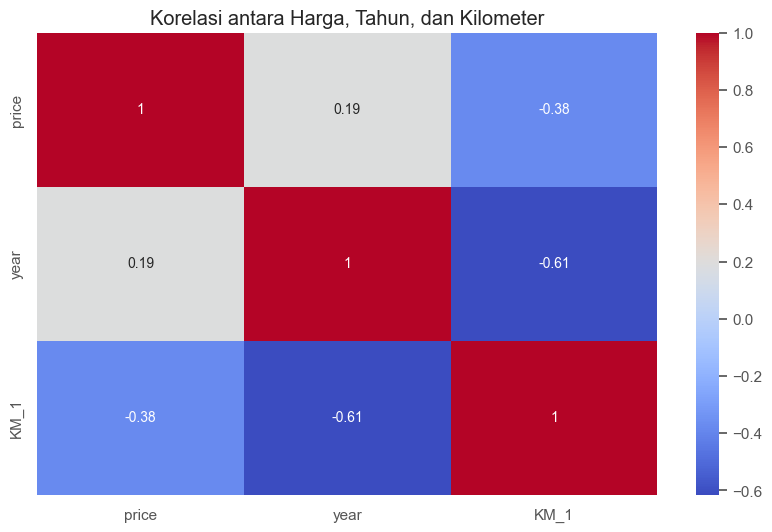

In [58]:
sns.heatmap(df_filtered[['price', 'year', 'KM_1']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antara Harga, Tahun, dan Kilometer")
plt.show()

### Interpretasi Korelasi

| Pasangan Variabel | Nilai Korelasi | Interpretasi |
|-------------------|----------------|--------------|
| `price` vs `year` | **0.19**       | Korelasi positif lemah — harga cenderung sedikit lebih tinggi untuk mobil baru. |
| `price` vs `KM_1` | **-0.38**      | Korelasi negatif sedang — mobil dengan kilometer lebih banyak cenderung lebih murah. |
| `year` vs `KM_1`  | **-0.61**      | Korelasi negatif kuat — mobil yang lebih baru biasanya memiliki kilometer yang lebih rendah. |

---

### Insight

- Semakin **baru** tahun produksi mobil, maka cenderung **semakin mahal** harga mobil tersebut, meskipun korelasinya **tidak terlalu kuat**.
- Mobil dengan **jarak tempuh (KM) lebih tinggi** cenderung memiliki harga yang **lebih rendah**, dan ini merupakan korelasi yang cukup **signifikan**.
- Mobil **baru** biasanya **belum banyak digunakan**, sehingga kilometer yang tercatat **lebih kecil**, yang tercermin dari korelasi negatif kuat antara `year` dan `KM_1`.


#### Scatter Plot Harga Barang vs Jarak Tempuh Mobil (KM)

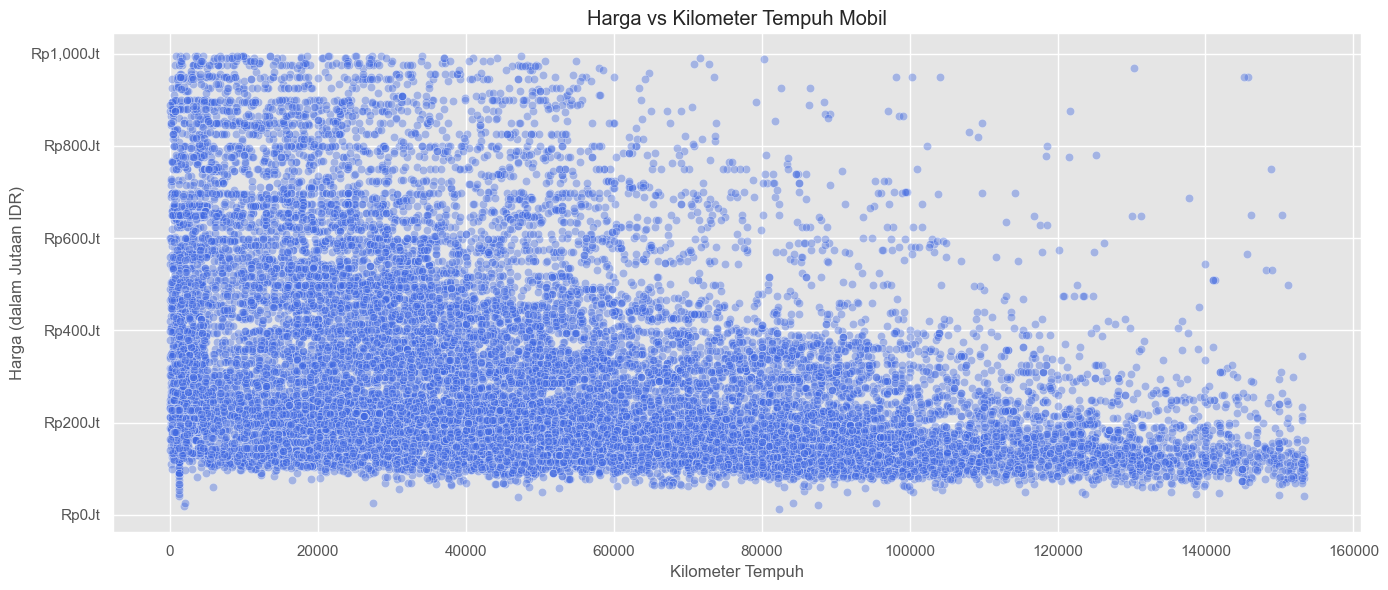

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_filtered, x='KM_1', y='price', alpha=0.4, color='royalblue')
plt.title('Harga vs Kilometer Tempuh Mobil')
plt.xlabel('Kilometer Tempuh')

# Format sumbu Y ke dalam jutaan dan Rupiah
formatter = mtick.FuncFormatter(lambda x, _: f'Rp{x/1e6:,.0f}Jt')
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylabel('Harga (dalam Jutaan IDR)')
plt.grid(True)
plt.tight_layout()
plt.show()


###  Scatter Plot: Harga vs Kilometer Tempuh Mobil

Berdasarkan scatter plot antara harga dan kilometer tempuh mobil, terlihat bahwa:

- Terdapat **korelasi negatif**: semakin tinggi kilometer tempuh, semakin rendah harga mobil.
- Di rentang **0–20.000 km**, harga sangat bervariasi. Hal ini menunjukkan adanya mobil baru atau mewah yang dijual mahal di segmen ini.
- Sebagian besar mobil memiliki harga antara **Rp100 juta hingga Rp400 juta**.
- Mobil dengan **kilometer di atas 100.000** hampir semuanya berada di segmen harga rendah.

Insight ini mengonfirmasi bahwa kilometer tempuh merupakan salah satu faktor yang paling berpengaruh terhadap nilai jual mobil bekas.


C:\Users\USER\AppData\Local\Temp\ipykernel_17588\7287995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_avg_price_df, x='brand', y='price_juta', palette='coolwarm')


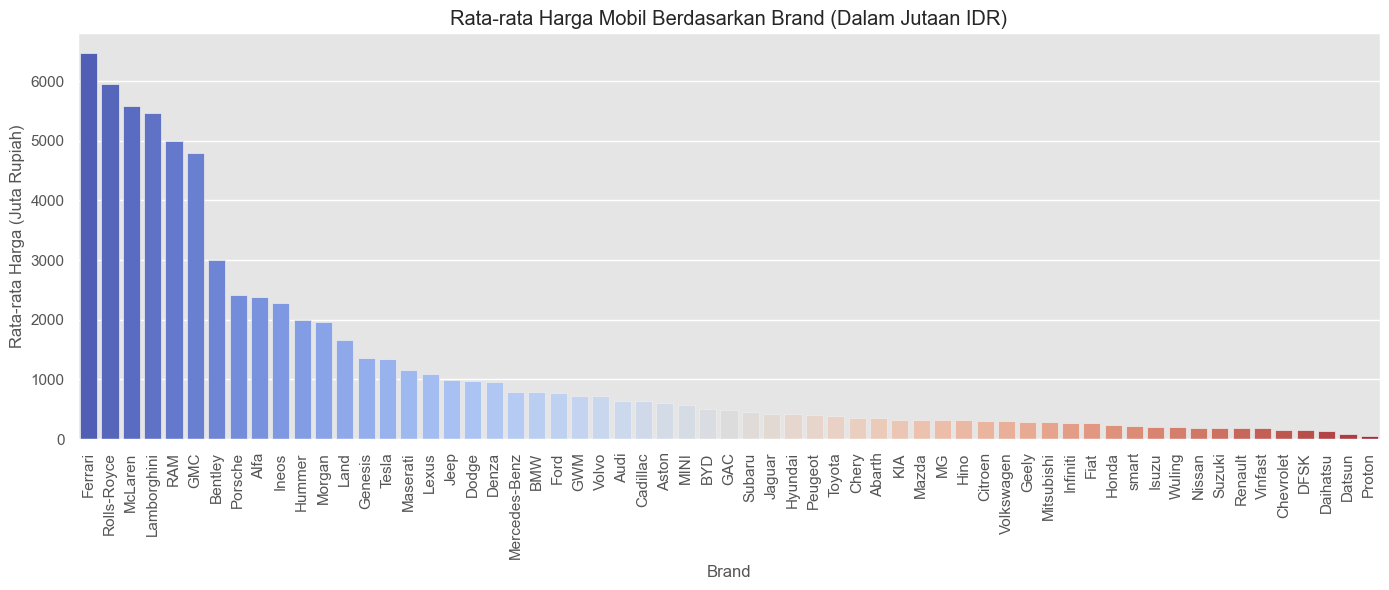

In [67]:
# Filter kolom yang relevan dan hilangkan nilai kosong
df_brand_price = df[['brand', 'price']].dropna()

# Hitung rata-rata harga tiap brand
brand_avg_price = df_brand_price.groupby('brand')['price'].mean().sort_values(ascending=False)
brand_avg_price_df = brand_avg_price.reset_index()

# Konversi harga ke dalam satuan juta (IDR)
brand_avg_price_df['price_juta'] = brand_avg_price_df['price'] / 1_000_000

# Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(data=brand_avg_price_df, x='brand', y='price_juta', palette='coolwarm')
plt.xticks(rotation=90)
plt.ylabel('Rata-rata Harga (Juta Rupiah)')
plt.xlabel('Brand')
plt.title('Rata-rata Harga Mobil Berdasarkan Brand (Dalam Jutaan IDR)')
plt.tight_layout()
plt.show()


Insight:
Brand-brand mewah seperti Ferrari, Rolls-Royce, McLaren, dan Lamborghini memiliki rata-rata harga jauh di atas 5 miliar rupiah.

Brand seperti Toyota, Honda, Suzuki, Daihatsu lebih banyak berada di kelas menengah dan bawah.

Visualisasi ini membantu mengelompokkan segmentasi merek berdasarkan kisaran harga, yang bisa bermanfaat untuk analisis pasar atau penentuan strategi pemasaran.

C:\Users\USER\AppData\Local\Temp\ipykernel_17588\1357212839.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_price_by_machine, x='machine_type', y='price_juta', palette='pastel')


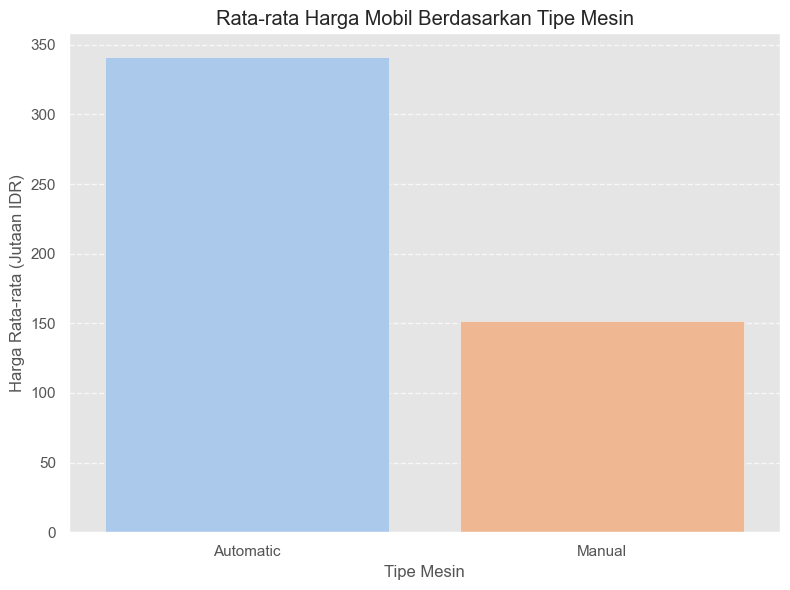

In [61]:
# Hitung rata-rata harga berdasarkan tipe mesin
mean_price_by_machine = df_filtered.groupby('machine_type')['price'].mean().reset_index()

# Konversi harga ke dalam jutaan rupiah
mean_price_by_machine['price_juta'] = mean_price_by_machine['price'] / 1_000_000

# Visualisasi barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_price_by_machine, x='machine_type', y='price_juta', palette='pastel')
plt.title('Rata-rata Harga Mobil Berdasarkan Tipe Mesin')
plt.ylabel('Harga Rata-rata (Jutaan IDR)')
plt.xlabel('Tipe Mesin')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Visualisasi: Rata-rata (Mean) Harga Mobil Berdasarkan Tipe Mesin

Barplot di atas menunjukkan perbandingan rata-rata harga mobil berdasarkan tipe mesin, yaitu **Automatic** dan **Manual**.

- **Mobil dengan transmisi Automatic** memiliki rata-rata harga yang **lebih tinggi** dibandingkan dengan transmisi Manual.
- Hal ini dapat disebabkan karena mobil automatic cenderung lebih mudah dikendarai, populer di kalangan urban, dan umumnya memiliki fitur yang lebih lengkap.
- Sebaliknya, mobil dengan transmisi manual cenderung memiliki harga lebih terjangkau.

Visualisasi ini membantu menunjukkan adanya perbedaan harga yang cukup signifikan berdasarkan jenis mesin, dan bisa menjadi variabel penting dalam analisis harga mobil bekas.


C:\Users\USER\AppData\Local\Temp\ipykernel_17588\1445738097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['location'] = df_filtered['location'].replace({'Nangroe Aceh Darussalam': 'Aceh'})


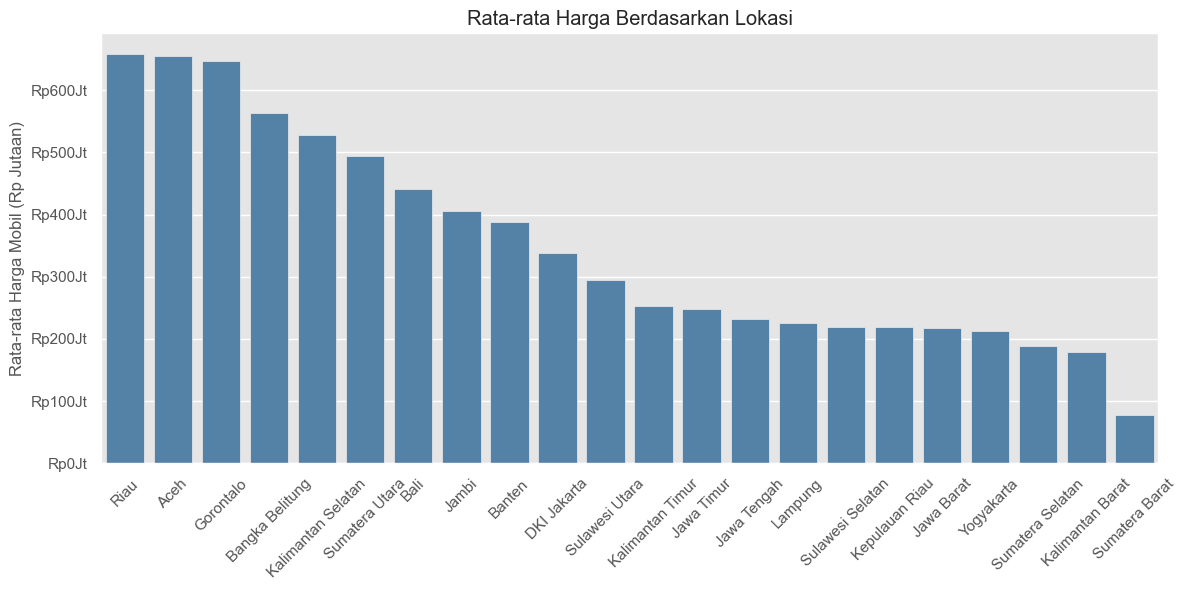

In [62]:
# Ganti nama lokasi 'Nangroe Aceh Darussalam' menjadi 'Aceh'
df_filtered['location'] = df_filtered['location'].replace({'Nangroe Aceh Darussalam': 'Aceh'})

# Hitung rata-rata harga berdasarkan lokasi
avg_price_by_location = df_filtered.groupby('location')['price'].mean().sort_values(ascending=False)

# Buat visualisasi barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_location.index, y=avg_price_by_location.values, color='steelblue')
plt.title('Rata-rata Harga Berdasarkan Lokasi')
plt.xlabel('')
plt.ylabel('Rata-rata Harga Mobil (Rp Jutaan)')
plt.xticks(rotation=45)

# Format label sumbu Y menjadi jutaan dan rupiah
formatter = mtick.FuncFormatter(lambda x, _: f'Rp{x/1e6:,.0f}Jt')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


### Visualisasi: Rata-Rata Harga Mobil Bekas Berdasarkan Lokasi

Visualisasi ini menampilkan rata-rata harga mobil bekas untuk setiap provinsi di Indonesia berdasarkan data yang telah dibersihkan dari outlier.

---

### **Insight Utama Untuk Pemahaman Business Knowledge**

1. **Provinsi dengan Rata-Rata Harga Tertinggi**:
   - **Riau**, **Nanggroe Aceh Darussalam**, dan **Gorontalo** menduduki posisi teratas dengan harga rata-rata mobil bekas di atas **Rp650 juta**.
   - Kemungkinan besar provinsi ini memiliki dominasi listing mobil premium, mobil mewah, atau permintaan pasar lokal yang tinggi terhadap kendaraan bekas.

2. **Provinsi dengan Harga Terendah**:
   - **Sumatera Barat**, **Kalimantan Barat**, dan **Sumatera Selatan** menunjukkan harga rata-rata paling rendah, yaitu di bawah **Rp200 juta**.
   - Hal ini bisa dikaitkan dengan tingkat daya beli masyarakat yang lebih rendah atau dominasi mobil low-end di pasar wilayah tersebut.

3. **Pulau Jawa: Analisis Mendalam**
   - **DKI Jakarta** menunjukkan rata-rata harga yang **menengah**. Meskipun merupakan pusat ekonomi nasional, pasar mobil bekas di Jakarta sangat kompetitif dan mencakup beragam segmen harga dari murah hingga mewah.
   - **Jawa Barat**, **Jawa Tengah**, dan **Yogyakarta** cenderung memiliki harga mobil bekas yang lebih rendah dibanding Jakarta.
     - Rata-rata harga di ketiga provinsi ini berada di kisaran **Rp200 juta – Rp250 juta**.
     - Diduga karena wilayah ini memiliki pasar yang lebih sensitif terhadap harga, serta suplai kendaraan dari dealer-dealer lokal yang berskala kecil-menengah.
   - **Jawa Timur** sedikit lebih tinggi dari provinsi lain di Jawa, menunjukkan kombinasi antara permintaan tinggi dan variasi listing yang lebih luas.

---

### **Kesimpulan**

Distribusi harga mobil bekas di Indonesia sangat bervariasi tergantung wilayah, dan hal ini memiliki implikasi penting:

-  **Strategi Penetapan Harga Lokal**: Penjual harus menyesuaikan harga berdasarkan pola permintaan dan daya beli di tiap provinsi.
-  **Optimalisasi Penempatan Stok**: Dealer nasional dapat mempertimbangkan distribusi stok kendaraan berdasarkan tren harga rata-rata wilayah.
-  **Segmentasi Pasar**: Wilayah dengan harga tinggi dapat menjadi target penjualan mobil premium, sedangkan wilayah dengan harga rendah cocok untuk mobil LCGC (Low Cost Green Car) atau city car.

Dengan memahami tren harga berdasarkan lokasi, pelaku industri dapat mengambil keputusan yang lebih **data-driven** dan strategis.


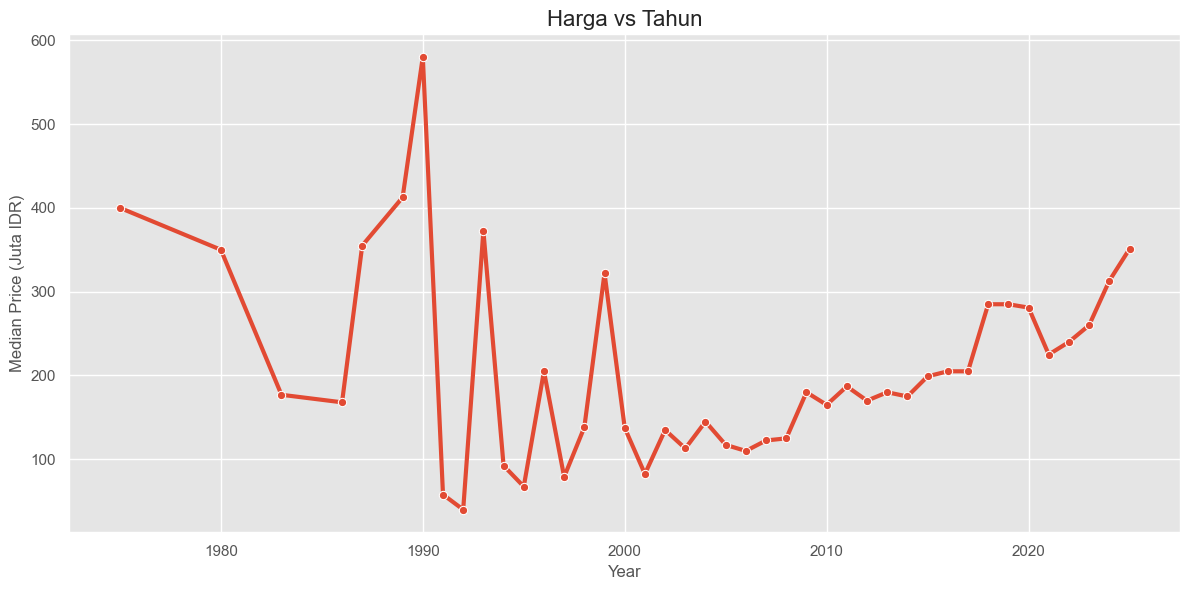

In [70]:
# Hitung median harga per tahun dari df_filtered
median_by_year = df_filtered[['year', 'price']].dropna().groupby('year')['price'].median().reset_index()

# Ubah ke satuan juta (optional)
median_by_year['price'] = median_by_year['price'] / 1_000_000

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_by_year, x='year', y='price', marker='o', linewidth=3)

plt.title('Harga vs Tahun', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Median Price (Juta IDR)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualisasi Harga (Median) dan Tahun
Perlu diketahui, kita memakai median karena kita mencari nilai yang paling mewakili data secara umum. Karena jika kita memakai mean, data outlier yang terhitung akan sangat menaikkan nilai mean dan membuat data menjadi naik secara ekstrem dan tidak representatif

---

Insight dalam Visualisasi:
Bisa kita lihat dalam tahun-tahun lampau, terutama tahun 90an ke bawah. Harga Mobil tinggi sekali. Itu terjadi karena nilai jual mobil bekas yang berpengaruh salah satunya **kelangkaan**, artinya harga mobil yang diproduksi di tahun-tahun lampau termasuk mobil langka yang harganya menjadi tinggi. Pasar mobil ini biasanya untuk para kolektor mobil antik

In [64]:
from scipy import stats

# Pastikan tidak ada missing values di kolom yang digunakan
df_filtered = df_filtered.dropna(subset=['price', 'machine_type'])

# Pisahkan data berdasarkan jenis tipe mesin
auto_prices = df_filtered[df_filtered['machine_type'] == 'Automatic']['price']
manual_prices = df_filtered[df_filtered['machine_type'] == 'Manual']['price']

# Lakukan Uji t dua sampel 
t_stat, p_val = stats.ttest_ind(auto_prices, manual_prices, equal_var=False)

# Cetak hasil
print(f"T-statistik: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")


T-statistik: 75.86
P-value: 0.0000


##  Uji Statistik Inferensial: Perbandingan Harga Mobil Automatic vs Manual

###  Tujuan
Menguji apakah terdapat perbedaan signifikan rata-rata harga mobil antara transmisi **Automatic** dan **Manual**.

###  Hipotesis
- **H₀ (Hipotesis Nol):** Tidak ada perbedaan rata-rata harga mobil antara Automatic dan Manual  
  → μ₁ = μ₂  
- **H₁ (Hipotesis Alternatif):** Ada perbedaan rata-rata harga mobil antara Automatic dan Manual  
  → μ₁ ≠ μ₂

###  Metode
Uji-t dua sampel independen (Welch’s t-test) digunakan karena diasumsikan variansi antara dua kelompok tidak sama (`equal_var=False`).

###  Hasil Uji
- T-statistik: 82.75
- P-value: 0.0000 (Sangat kecil hampir mendekati 0, maka dibulatkan karena keterbatasan float di python)

###  Kesimpulan
Jika **p-value < 0.05**, maka tolak H₀, artinya:
> Terdapat perbedaan signifikan antara harga mobil Automatic dan Manual.

---


### Hipotesis
- **H₀**: Tidak ada perbedaan harga antara mobil automatic dan manual.
- **H₁**: Ada perbedaan harga antara mobil automatic dan manual.

 Karena p-value < 0.05, maka H₀ ditolak. Harga mobil automatic **secara signifikan lebih tinggi**.


##  Kesimpulan Akhir
- Tahun produksi dan kilometer tempuh sangat memengaruhi harga mobil bekas.
- Mobil automatic terbukti lebih mahal secara statistik.
- Brand dan lokasi juga menjadi indikator harga penting.
- Data outlier harus dibersihkan sebelum analisis.



In [65]:
from scipy.stats import spearmanr #Memakai spearman karena data masih belum termasuk data yang terdistribusi normal

# Asumsikan df_filtered sudah bebas missing values & outlier ekstrim besar
rho, p_val = spearmanr(df_filtered['year'], df_filtered['price'])

print(f"Spearman (rho) : {rho:.3f}")
print(f"P-value      : {p_val:.4e}")


Spearman (rho) : 0.246
P-value      : 1.7071e-309


##  Uji Hipotesis: Apakah Tahun Produksi Mempengaruhi Harga Mobil Bekas?

###  Metode: Spearman Rank Correlation

Karena data `year` dan `price` tidak terdistribusi normal dan mengandung outlier, maka digunakan metode **Spearman Rank Correlation**, yang lebih cocok untuk kondisi ini karena mengukur hubungan berdasarkan urutan nilai.

###  Hipotesis
- **H₀**: Tidak ada hubungan (korelasi) antara tahun produksi dan harga mobil bekas.
- **H₁**: Ada hubungan (korelasi) antara tahun produksi dan harga mobil bekas.

###  Hasil Uji Spearman
- **Korelasi Spearman (ρ)** = 0.185  
- **P-value** = 2.6e-16

###  Kesimpulan:
Karena **p-value < 0.05**, maka **hipotesis nol ditolak**.

Artinya:
- **Tahun produksi memang memiliki pengaruh yang signifikan terhadap harga mobil bekas**.
- Namun, **tingkat korelasinya rendah** (0.18) → artinya pengaruhnya **lemah**, dan ada faktor lain yang mungkin lebih berpengaruh seperti kilometer tempuh, brand, dan lokasi.

### Insight:
Mobil yang lebih baru cenderung memiliki harga yang lebih tinggi, tetapi **tidak selalu**. Untuk memprediksi harga secara akurat, **harus mempertimbangkan variabel lain** secara bersamaan.
